In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [26]:
%load_ext klab-autotime

In [3]:
train = pd.read_csv('../data_files/4.Allstate_data/train.csv')
test = pd.read_csv('../data_files/4.Allstate_data/test.csv')

time: 5.1 s


In [4]:
# 为了显示所有的行和列
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

time: 435 µs


In [5]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


time: 221 ms


In [6]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


time: 89.2 ms


In [7]:
pd.isnull(train).values.any()

False

time: 738 ms


In [8]:
# 统计离散型变量的数目
cat_features = list(train.select_dtypes(include=['object']).columns)
print('Categorical:{} features'.format(len(cat_features)))

Categorical:116 features
time: 238 ms


In [9]:
# 统计连续型变量的数目
cont_features = [cont for cont in list(train.select_dtypes(include=['float64']).columns) if cont not in ['loss']]
print('Continuous: {} features'.format(len(cont_features)))

Continuous: 14 features
time: 23.3 ms


In [10]:
cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(train[cat].unique()))
uniq_values_in_categories = pd.DataFrame.from_items([('cat_name',cat_features),('unique_values', cat_uniques)])

time: 599 ms


In [11]:
uniq_values_in_categories

,cat_name,unique_values
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
5,cat6,2
6,cat7,2
7,cat8,2
8,cat9,2
9,cat10,2


time: 11.9 ms


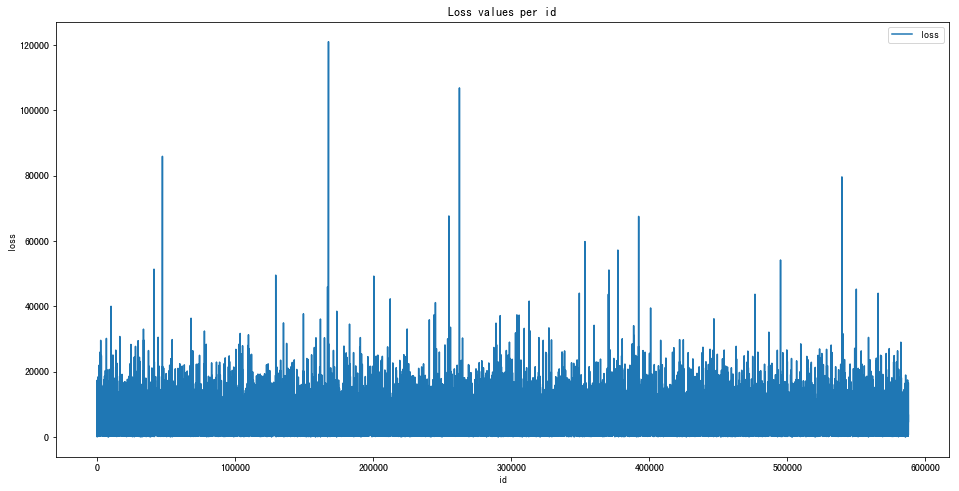

time: 634 ms


In [12]:
plt.figure(figsize=(16,8))
plt.plot(train['id'],train['loss'])
plt.title('Loss values per id')
plt.xlabel('id')
plt.ylabel('loss')
plt.legend()
plt.show()

Text(7, 71, 'Binary features')

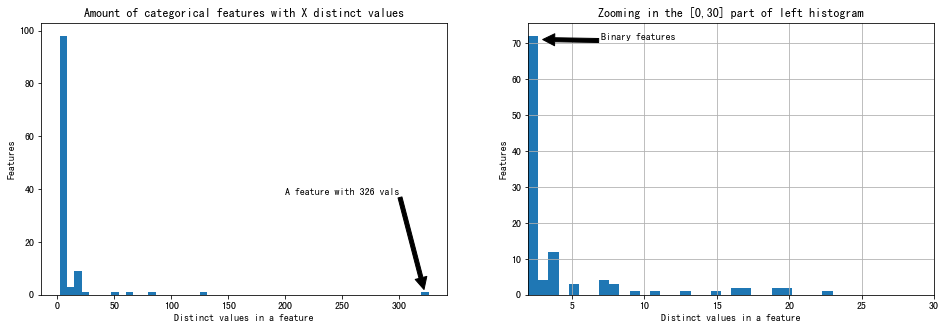

time: 495 ms


In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(uniq_values_in_categories.unique_values, bins=50)
ax1.set_title('Amount of categorical features with X distinct values')
ax1.set_xlabel('Distinct values in a feature')
ax1.set_ylabel('Features')

ax1.annotate('A feature with 326 vals', xy=(322, 2), xytext=(200, 38), arrowprops=dict(facecolor='black'))

ax2.set_xlim(2,30)
ax2.set_title('Zooming in the [0,30] part of left histogram')
ax2.set_xlabel('Distinct values in a feature')
ax2.set_ylabel('Features')
ax2.grid(True)
ax2.hist(uniq_values_in_categories[uniq_values_in_categories.unique_values <= 30].unique_values, bins=30)
ax2.annotate('Binary features', xy=(3, 71), xytext=(7, 71), arrowprops=dict(facecolor='black'))

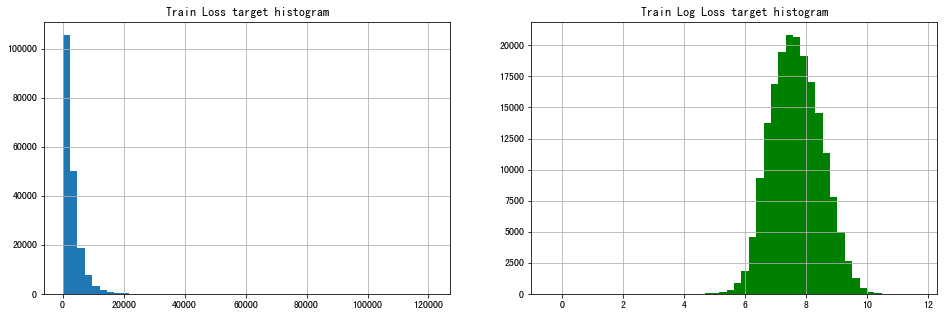

time: 505 ms


In [14]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['loss'], bins=50)
ax1.set_title('Train Loss target histogram')
ax1.grid(True)
ax2.hist(np.log(train['loss']), bins=50, color='g')
ax2.set_title('Train Log Loss target histogram')
ax2.grid(True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a9374ad90>,
      dtype=object)

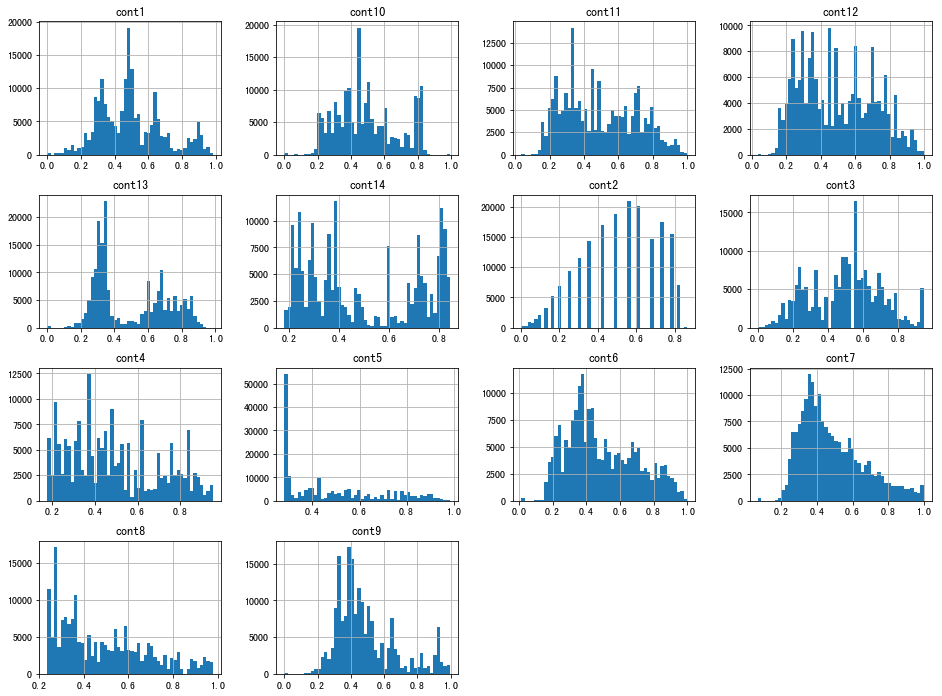

time: 2.7 s


In [15]:
# One thing we can do is to plot histogram of the numerical features and analyze their distributions:
train[cont_features].hist(bins=50,figsize=(16,12))

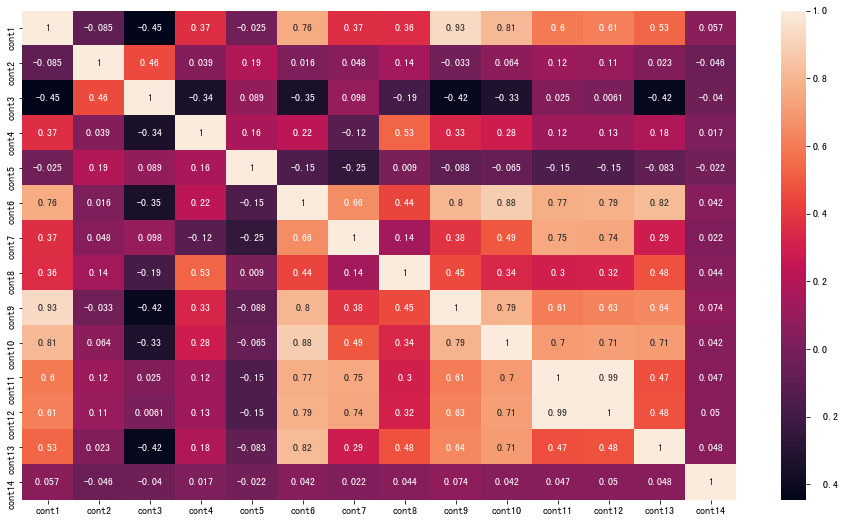

time: 1.07 s


In [16]:
# 得到各个变量的相关性
plt.subplots(figsize=(16,9))
correlation_mat = train[cont_features].corr()
sns.heatmap(correlation_mat , annot = True)

In [17]:
train.corr()['loss'].sort_values()

cont4    -0.035831
cont5    -0.011355
cont1    -0.010237
cont13   -0.004022
id       -0.001122
cont9     0.014456
cont14    0.019298
cont10    0.020236
cont8     0.030508
cont6     0.040967
cont12    0.098724
cont11    0.099806
cont3     0.111053
cont7     0.119799
cont2     0.141528
loss      1.000000
Name: loss, dtype: float64

time: 134 ms


In [18]:
# for feature in cat_features:
#     sns.countplot(x = train[feature], data = train)
#     plt.show()

time: 248 µs


In [19]:
for c in range(len(cat_features)):
    train[cat_features[c]] = train[cat_features[c]].astype('category').cat.codes

time: 8.37 s


In [20]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,3,3,1,3,2,1,3,1,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,3,1,3,2,1,1,1,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,3,3,3,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,1,3,1,1,2,1,1,2,0,0,0,1,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


time: 57.5 ms


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X, y = train[train.columns.delete(-1)],train['loss']
X.drop('id',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time: 353 ms


In [22]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
coef = linear_model.coef_#回归系数
line_pre = linear_model.predict(X_test)
print('SCORE:{:.4f}'.format(linear_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))
print('MAE:{:.4f}'.format(np.sqrt(mean_absolute_error(y_test,line_pre))))

SCORE:0.4809
RMSE:2076.5137
MAE:36.4674
time: 2.3 s


In [23]:
train.drop('id',axis=1,inplace=True)
df_coef = pd.DataFrame()
df_coef['Title'] = train.columns.delete(-1)
df_coef['Coef'] = coef
df_coef

,Title,Coef
0,cat1,-409.208216
1,cat2,320.889215
2,cat3,245.817392
3,cat4,64.107341
4,cat5,94.290663
5,cat6,-330.915562
6,cat7,679.176075
7,cat8,131.800018
8,cat9,34.642249
9,cat10,160.720535


time: 44.1 ms


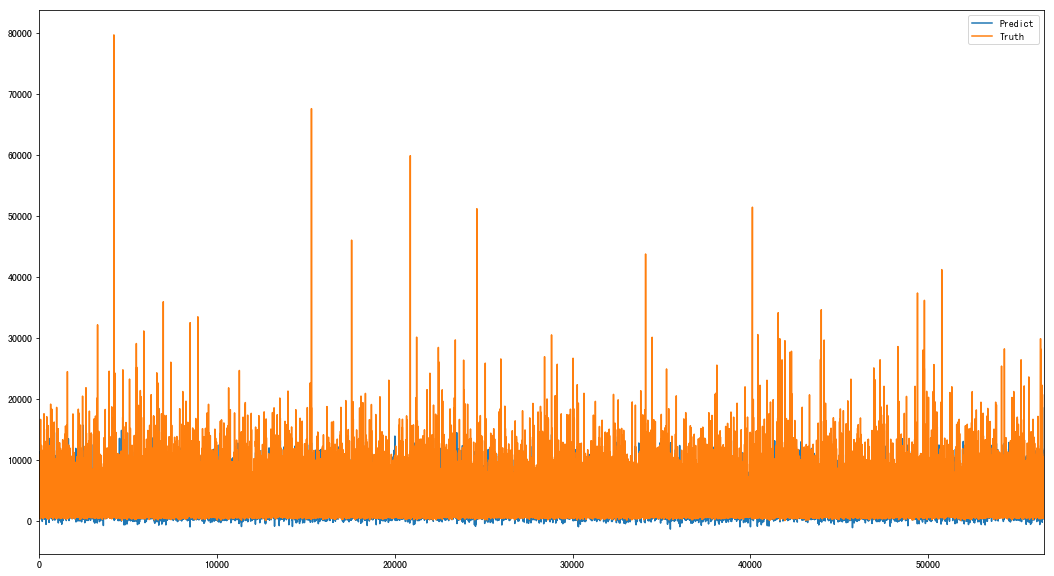

time: 1.01 s


In [24]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y_test.reset_index(drop=True)
hos_pre.plot(figsize=(18,10))

In [25]:
#RMSE algorithims prefer symmetric data
train['log_loss'] = np.log(train['loss'])

time: 6.54 ms


In [26]:
X = train[train.columns.delete(-1)]
X = X[X.columns.delete(-1)]
y = train['log_loss']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=18)

time: 140 ms


In [27]:
linear_model_loss = LinearRegression()
linear_model_loss.fit(X_train, y_train)
coef = linear_model_loss.coef_#回归系数
predicted = linear_model_loss.predict(X_test)
y_test = np.exp(y_test)
predicted = np.exp(predicted)

time: 2.34 s


In [28]:
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, predicted))))
print("MAE:{:.4f}".format(mean_absolute_error(y_test,predicted)))

RMSE:2268.5460
MAE:1284.6792
time: 2.33 ms


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB
time: 14.1 ms


In [30]:
test = pd.read_csv('../data_files/4.Allstate_data/test.csv')
test_id = test['id']
test.drop('id',axis=1,inplace=True)
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


time: 2.1 s


In [31]:
for c in range(len(cat_features)):
    test[cat_features[c]] = train[cat_features[c]].astype('category').cat.codes

time: 5.94 s


In [32]:
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,3,3,1,3,2,1,3,1,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,269,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,3,1,3,2,1,1,1,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,3,3,3,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,1,3,1,1,2,1,1,2,0,0,0,1,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


time: 49.6 ms


In [33]:
pred = linear_model.predict(test)

time: 93.9 ms


In [34]:
# model.fit(train_x, train['log_loss'])
# predicted = model.predict(X)
# predicted = np.exp(predicted) 
submission = pd.DataFrame({
       "id": test_id,
        "loss": linear_model.predict(test)
    })
submission.to_csv('Submission.csv', index = False)

time: 490 ms


In [35]:
X = train[train.columns.delete(-1)]
X = X[X.columns.delete(-1)]
y = train['loss']
X.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,3,3,1,3,2,1,3,1,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,3,1,3,2,1,1,1,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,3,3,3,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,1,3,1,1,2,1,1,2,0,0,0,1,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


time: 94.4 ms


In [36]:
from sklearn.svm import LinearSVR
X = train[train.columns.delete(-1)]
X = X[X.columns.delete(-1)]
y = train['loss']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)
model_SVR = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive',
fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0,
random_state=None, max_iter=1000)
model_SVR.fit(X_train, y_train)
predicted = model_SVR.predict(X_test)
print("Model complete")
print(predicted)
mae = mean_absolute_error(predicted, y_test)
print("RMSE:{:.4f}".format(np.sqrt(mean_squared_error(predicted,y_test))))
print("Training data mean absolute error: ",mae)

Model complete
[1682.66814319 1356.47267799 2980.6050236  ...  993.89405177 1532.73550776
 2291.45267582]
RMSE:2193.6829
Training data mean absolute error:  1278.0637246042866
time: 28.5 s


In [37]:
model_SVR.fit(X,y)
submission = pd.DataFrame({
       "id": test_id,
        "loss": model_SVR.predict(test)
    })
submission.to_csv('Submission2.csv', index = False)

time: 43 s


In [4]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error as mae, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRegressor

In [5]:
train = pd.read_csv('../data_files/4.Allstate_data/train.csv')
test = pd.read_csv('../data_files/4.Allstate_data/test.csv')

In [6]:
# 统计离散型变量的数目
cat_features = list(train.select_dtypes(include=['object']).columns)
print('Categorical:{} features'.format(len(cat_features)))
train['log_loss'] = np.log(train['loss'])
features = [x for x in train.columns if x not in ['id','loss','log_loss']]
len(features)

Categorical:116 features


130

In [ ]:
train.shape
X = train[features]
y = train['loss']
for c in range(len(cat_features)):
    X[cat_features[c]] = X[cat_features[c]].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)
test_id = test['id']
test.drop('id',axis=1,inplace=True)
for c in range(len(cat_features)):
    test[cat_features[c]] = test[cat_features[c]].astype('category').cat.codes

In [8]:
# def xg_eval_mae(yhat,dtrain):
#     y = dtrain.get_label()
#     return 'mae',mae(np.exp(y),np.exp(yhat))

In [9]:
# dtrain = xgb.DMatrix(X,y)

In [10]:
# xgb_params = {
#     'seed':0,
#     'eta':0.1,
#     'colsample_bytree':0.5,
#     'silent':1,
#     'subsample':0.5,
#     'objective':'reg:linear',
#     'max_depth':5,
#     'min_child_weight':3
# }

In [11]:
# bst_cv1 = xgb.cv(xgb_params,dtrain,num_boost_round=50,nfold=3,seed=0,feval=xg_eval_mae,maximize=False,early_stopping_rounds=10)
# print('CV score',bst_cv1.iloc[-1,:]['test-mae-mean'])

In [12]:
# plt.figure()
# bst_cv1[['train-mae-mean','test-mae-mean']].plot()

In [13]:
# bst_cv2 = xgb.cv(xgb_params,dtrain,num_boost_round=100,nfold=3,seed=0,feval=xg_eval_mae,maximize=False,early_stopping_rounds=10)
# print('CV score',bst_cv2.iloc[-1,:]['test-mae-mean'])

In [14]:
# fig, (ax1, ax2) = plt.subplots(1,2)
# fig.set_size_inches(16,4)

# ax1.set_title('100 rounds of training')
# ax1.set_xlabel('Rounds')
# ax1.set_ylabel('Loss')
# ax1.grid(True)
# ax1.plot(bst_cv2[['train-mae-mean', 'test-mae-mean']])
# ax1.legend(['Training Loss', 'Test Loss'])

# ax2.set_title('60 last rounds of training')
# ax2.set_xlabel('Rounds')
# ax2.set_ylabel('Loss')
# ax2.grid(True)
# ax2.plot(bst_cv2.iloc[40:][['train-mae-mean', 'test-mae-mean']])
# ax2.legend(['Training Loss', 'Test Loss'])

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.01)
reg.fit(X_train,y_train)
reg_predict = reg.predict(X_test)
print('mse = {}'.format(mae(reg_predict,y_test)))

In [ ]:
# reg.fit(X,y)
submission = pd.DataFrame({
       "id": test_id,
        "loss": np.exp(reg.predict(test))
    })
submission.to_csv('Submission3_xgboost.csv', index = False)

In [38]:
reg2 = xgb.XGBRegressor(reg_alpha=0.2,  n_estimators=10000, learning_rate=0.05)
reg2 = reg2.fit(X_train, y_train)

NameError: name 'lr_predict' is not defined

time: 2h 45min 35s


In [ ]:
reg_predict2 = reg2.predict(X_test)
mae = mae(reg_predict2, y_test)
print('mse = {}'.format(mae))
print("RMSE:{:.4f}".format(np.sqrt(mean_squared_error(reg_predict2, y_test))))
print("Training data mean absolute error: ",mae)

In [ ]:
submission = pd.DataFrame({
       "id": test_id,
        "loss": reg2.predict(test)
    })
submission.to_csv('Submission4_xgboost.csv', index = False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as gBR
reg3 = gBR()
reg3 = reg3.fit(X_train, y_train)
predict = reg.predict(y_test)
mae = mae(predict, y_test)
print('mse = {}'.format(mae))
print("RMSE:{:.4f}".format(np.sqrt(mean_squared_error(predict, y_test))))
print("Training data mean absolute error: ",mae)

In [ ]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')
path = u'../data_files/4.Allstate_data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

train['log_loss'] = np.log(train['loss'])
cat_features = list(train.select_dtypes(include=['object']).columns)
print('Categorical:{} features'.format(len(cat_features)))
train['log_loss'] = np.log(train['loss'])
features = [x for x in train.columns if x not in ['id','loss','log_loss']]
len(features)

X = train[features]
y = train['log_loss']
for c in range(len(cat_features)):
    X[cat_features[c]] = X[cat_features[c]].astype('category').cat.codes

test_id = test['id']
test.drop('id',axis=1,inplace=True)
for c in range(len(cat_features)):
    test[cat_features[c]] = test[cat_features[c]].astype('category').cat.codes

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

n_estimators= 1000
reg = xgboost.XGBRegressor(n_estimators=n_estimators,learning_rate=0.05)
reg.fit(X_train,y_train)
print('model Complete!')
pred = np.exp(reg.predict(X_test))
print('mae = {}'.format(mae(pred,np.exp(y_test))))
print('rmse = {}'.format(np.sqrt(mse(pred,np.exp(y_test)))))

reg_full = xgboost.XGBRegressor(n_estimators=n_estimators,learning_rate=0.05)
reg_full.fit(X,y)
result = pd.DataFrame({
    'id':test_id,
    'loss':np.exp(reg_full.predict(test))
})

result.to_csv('result.csv',index=False)

In [ ]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')
path = u'D:/学习/数据科学导论/数据科学导论大作业/data files/allstate-claims-severity/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

train['log_loss'] = np.log(train['loss'])
cat_features = list(train.select_dtypes(include=['object']).columns)
print('Categorical:{} features'.format(len(cat_features)))
train['log_loss'] = np.log(train['loss'])
features = [x for x in train.columns if x not in ['id','loss','log_loss']]
len(features)

X = train[features]
y = train['log_loss']
for c in range(len(cat_features)):
    X[cat_features[c]] = X[cat_features[c]].astype('category').cat.codes

test_id = test['id']
test.drop('id',axis=1,inplace=True)
for c in range(len(cat_features)):
    test[cat_features[c]] = test[cat_features[c]].astype('category').cat.codes

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

# n_estimators= 700
# reg = xgboost.XGBRegressor(n_estimators=n_estimators,learning_rate=0.05)
# reg.fit(X_train,y_train)
# print('model Complete!')
# pred = np.exp(reg.predict(X_test))
# print('mae = {}'.format(mae(pred,np.exp(y_test))))
# print('rmse = {}'.format(np.sqrt(mse(pred,np.exp(y_test)))))
#
# reg_full = xgboost.XGBRegressor(n_estimators=n_estimators,learning_rate=0.05)
# reg_full.fit(X,y)
# n_estimators= 700

from sklearn.ensemble import GradientBoostingRegressor as gBR
n_estimators= 100
reg2 = gBR(n_estimators=n_estimators,learning_rate=0.05)
reg2 = reg2.fit(X_train, y_train)

print('model Complete!')
pred = np.exp(reg2.predict(X_test))
print('mae = {}'.format(mae(pred,np.exp(y_test))))
print('rmse = {}'.format(np.sqrt(mse(pred,np.exp(y_test)))))

reg2_full = gBR(n_estimators=n_estimators,learning_rate=0.05)
reg2_full.fit(X,y)
result = pd.DataFrame({
    'id':test_id,
    'loss':np.exp(reg2_full.predict(test))
})

result.to_csv('result.csv',index=False)

In [ ]:
# import xgboost
# from xgboost import XGBClassifier 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# submission = pd.DataFrame({
#        "id": test_id,
#         "loss": model.predict(test)
#     })
# submission.to_csv('Submission3_xgboost.csv', index = False)

In [ ]:
# reg = xgboost.XGBRegressor(reg_alpha=0.2,  n_estimators=10000, learning_rate=0.05)
# reg = reg.fit(X_train, y_train)
# lr_predict = reg.predict(X_test)
# mae = mean_absolute_error(lr_predict, y_test)
# print("RMSE:{:.4f}".format(np.sqrt(mean_squared_error(lr_predict, y_test))))
# print("Training data mean absolute error: ",mae)